## Reading from Database

In [1]:
import pandas as pd #Used for data manipulation and analysis
import numpy as np #Used for numerical computations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3 #Used to connect to a SQLite database

In [3]:
# Connect to a SQLite database
con = sqlite3.connect(r'C:\Users\prate\Desktop\Jupyter_Python\my_proj\Data\Geospatial_analysis_Zomato\zomato_rawdata.sqlite')

In [4]:
# Read the first 4 rows from the 'Users' table into a Pandas DataFrame (for initial exploration)
pd.read_sql_query("SELECT * from Users",con).head(4)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   

  online_order book_table   rate  votes                           phone  \
0          Yes        Yes  4.1/5    775  080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                    080 41714161   
2          Yes         No  3.8/5    918                  +91 9663487993   
3           No         No  3.7/5     88                  +91 9620009302   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari

In [5]:
# Read the entire 'Users' table into a Pandas DataFrame
df = pd.read_sql_query("SELECT * from Users",con)

In [6]:
# Get the DataFrame's shape (number of rows and columns)
df.shape

(51717, 18)

In [7]:
# Get the column names of the DataFrame
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# Check for missing values in the DataFrame
df.isnull()

index    url  address   name  online_order  book_table   rate  votes  \
0      False  False    False  False         False       False  False  False   
1      False  False    False  False         False       False  False  False   
2      False  False    False  False         False       False  False  False   
3      False  False    False  False         False       False  False  False   
4      False  False    False  False         False       False  False  False   
...      ...    ...      ...    ...           ...         ...    ...    ...   
51712  False  False    False  False         False       False  False  False   
51713  False  False    False  False         False       False   True  False   
51714  False  False    False  False         False       False   True  False   
51715  False  False    False  False         False       False  False  False   
51716  False  False    False  False         False       False  False  False   

       phone  location  rest_type  dish_liked  cuisines  \
0      False     False      False       False     False   
1      False     False      False       False     False   
2      False     False      False       False     False   
3      False     False      False       False     False   
4      False     False      False       False     False   
...      ...       ...        ...         ...       ...   
51712  False     False      False        True     False   
51713  False     False      False        True     False   
51714   True     False      False        True     False   
51715  False     False      False       False     False   
51716  False     False      False        True     False   

       approx_cost(for two people)  reviews_list  menu_item  listed_in(type)  \
0                            False         False      False            False   
1                            False         False      False            False   
2                            False         False      False            False   
3                            False         False      False            False   
4                            False         False      False            False   
...                            ...           ...        ...              ...   
51712                        False         False      False            False   
51713                        False         False      False            False   
51714                        False         False      False            False   
51715                        False         False      False            False   
51716                        False         False      False            False   

       listed_in(city)  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
51712            False  
51713            False  
51714            False  
51715            False  
51716            False  

[51717 rows x 18 columns]

In [9]:
# Count the number of missing values in each column
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
# Calculate the percentage of missing values in each column
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [11]:
# Get the unique values in the 'rate' column (before cleaning)
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# Replace 'NEW' and '-' values in the 'rate' column with NaN (missing values)
df['rate'].replace(('NEW','-'), np.nan, inplace = True)

C:\Users\prate\AppData\Local\Temp\ipykernel_20992\2213797328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(('NEW','-'), np.nan, inplace = True)


In [13]:
# Get the unique values in the 'rate' column (after cleaning)
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
"4.1/5".split('/')[0]

'4.1'

In [15]:
type("4.1/5".split('/')[0])

str

In [16]:
float("4.1/5".split('/')[0])

4.1

In [17]:
# Apply a lambda function to convert 'rate' column values to floats (if strings) or leave them unchanged (if not strings)
df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [18]:
# Apply a lambda function to convert 'rate' column values to floats (if strings) or leave them unchanged (if not strings)
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [19]:
# Print the (potentially modified) 'rate' column
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

## Analysis : Relation between online order option & rating of restaurant

In [20]:
# Show the first 4 rows (optional)
df.head(4)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                    080 41714161   
2          Yes         No   3.8    918                  +91 9663487993   
3           No         No   3.7     88                  +91 9620009302   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari

In [21]:
# Create a contingency table (cross-tabulation)
pd.crosstab(df['rate'], df['online_order'])

online_order    No   Yes
rate                    
1.8              5     0
2.0             11     0
2.1              9    15
2.2             10    16
2.3             29    22
2.4             36    34
2.5             38    63
2.6             83   177
2.7            141   166
2.8            224   376
2.9            314   488
3.0            439   584
3.1            587   974
3.2            829  1044
3.3           1137  1173
3.4           1024  1452
3.5           1090  1694
3.6           1090  2226
3.7           1172  2649
3.8           1147  2726
3.9           1017  2955
4.0            874  2309
4.1            843  2105
4.2            648  1536
4.3            692  1001
4.4            374   773
4.5            297   359
4.6            140   160
4.7            113    54
4.8             34    32
4.9             12    43

In [22]:
# Create a contingency table (cross-tabulation)
# the contingency table showing counts of online orders for each rate
x = pd.crosstab(df['rate'], df['online_order'])

<Axes: xlabel='rate'>

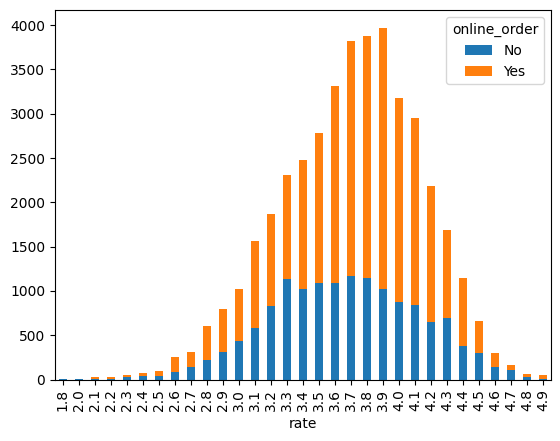

In [23]:
# Plot the contingency table as a stacked bar chart
x.plot( kind='bar', stacked = True)

In [24]:
# Get the sum of each column (total counts for each rate)
x.sum(axis=0)

online_order
No     14459
Yes    27206
dtype: int64

In [25]:
# Get the sum of each row (total counts for each online order category)
x.sum(axis=1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [26]:
# Convert row sum to float for normalization (avoid division by zero)
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [27]:
# Normalize the contingency table (divide each cell by its row sum)
normalize_df = x.div(x.sum(axis=1).astype(float), axis =0)
normalize_df

online_order        No       Yes
rate                            
1.8           1.000000  0.000000
2.0           1.000000  0.000000
2.1           0.375000  0.625000
2.2           0.384615  0.615385
2.3           0.568627  0.431373
2.4           0.514286  0.485714
2.5           0.376238  0.623762
2.6           0.319231  0.680769
2.7           0.459283  0.540717
2.8           0.373333  0.626667
2.9           0.391521  0.608479
3.0           0.429130  0.570870
3.1           0.376041  0.623959
3.2           0.442605  0.557395
3.3           0.492208  0.507792
3.4           0.413570  0.586430
3.5           0.391523  0.608477
3.6           0.328709  0.671291
3.7           0.306726  0.693274
3.8           0.296153  0.703847
3.9           0.256042  0.743958
4.0           0.274584  0.725416
4.1           0.285957  0.714043
4.2           0.296703  0.703297
4.3           0.408742  0.591258
4.4           0.326068  0.673932
4.5           0.452744  0.547256
4.6           0.466667  0.533333
4.7           0.676647  0.323353
4.8           0.515152  0.484848
4.9           0.218182  0.781818

In [28]:
# Calculate percentages by multiplying normalized values by 100
normalize_df*100

online_order          No        Yes
rate                               
1.8           100.000000   0.000000
2.0           100.000000   0.000000
2.1            37.500000  62.500000
2.2            38.461538  61.538462
2.3            56.862745  43.137255
2.4            51.428571  48.571429
2.5            37.623762  62.376238
2.6            31.923077  68.076923
2.7            45.928339  54.071661
2.8            37.333333  62.666667
2.9            39.152120  60.847880
3.0            42.913001  57.086999
3.1            37.604100  62.395900
3.2            44.260545  55.739455
3.3            49.220779  50.779221
3.4            41.357027  58.642973
3.5            39.152299  60.847701
3.6            32.870929  67.129071
3.7            30.672599  69.327401
3.8            29.615285  70.384715
3.9            25.604230  74.395770
4.0            27.458373  72.541627
4.1            28.595658  71.404342
4.2            29.670330  70.329670
4.3            40.874188  59.125812
4.4            32.606800  67.393200
4.5            45.274390  54.725610
4.6            46.666667  53.333333
4.7            67.664671  32.335329
4.8            51.515152  48.484848
4.9            21.818182  78.181818

<Axes: xlabel='rate'>

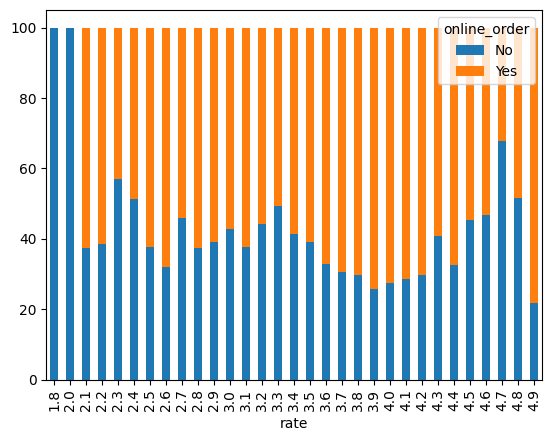

In [29]:
# Plot the normalized table (percentages) as a stacked bar chart
(normalize_df*100).plot( kind='bar', stacked = True)

## Data cleaning to perform Text Analysis

In [30]:
# Display the first 3 rows of the DataFrame to get a quick glimpse at the data
df.head(3)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   

                                             address             name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...            Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                    080 41714161   
2          Yes         No   3.8    918                  +91 9663487993   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari

In [31]:
# Check for missing values in the 'rest_type' column and count them
df['rest_type'].isnull().sum()

227

In [32]:
# Create a new DataFrame 'data' excluding rows with missing values in 'rest_type'
data = df.dropna(subset=['rest_type'])

In [33]:
data['rest_type'].isnull().sum()

0

In [34]:
# Find all unique values present in the 'rest_type' column
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [35]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [36]:
# Filter the DataFrame to include only rows where 'rest_type' contains 'Quick Bites' (case-sensitive)
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [37]:
quick_bites_df

index                                                url  \
3          3  https://www.zomato.com/bangalore/addhuri-udupi...   
23        23  https://www.zomato.com/bangalore/my-tea-house-...   
26        26  https://www.zomato.com/bangalore/coffee-tindi-...   
31        31  https://www.zomato.com/bangalore/foodiction-1-...   
34        34  https://www.zomato.com/bangalore/faasos-banash...   
...      ...                                                ...   
51641  51641  https://www.zomato.com/bangalore/andhra-spices...   
51642  51642  https://www.zomato.com/bangalore/basaveshwara-...   
51643  51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51645  51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                 address  \
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
23     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
26     27th Cross Rd, Banashankari Stage II, Banashan...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
...                                                  ...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   
51642  Nanjudeshwari complex, Oppsite Brookefield Mal...   
51643  AECS Layout, ITPL Main Road, Brookefield, Bang...   
51644  7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
51645  Opposite Brookefield Mall, Kundanhalli, Brooke...   

                         name online_order book_table  rate  votes  \
3       Addhuri Udupi Bhojana           No         No   3.7     88   
23               My Tea House          Yes         No   3.6     62   
26               Coffee Tindi          Yes         No   3.8     75   
31                 Foodiction          Yes         No   2.8    506   
34                     Faasos          Yes         No   4.2    415   
...                       ...          ...        ...   ...    ...   
51641           Andhra Spices           No         No   3.2      4   
51642  Basaveshwara Khanavali           No         No   NaN      0   
51643       New Ambur Biryani           No         No   NaN      0   
51644          Punjabi Thadka           No         No   NaN      0   
51645               Raapchick          Yes         No   3.6     49   

                                phone      location          rest_type  \
3                      +91 9620009302  Banashankari        Quick Bites   
23     080 65975430\r\n+91 7337733798  Banashankari  Quick Bites, Cafe   
26                     +91 9945758046  Banashankari  Cafe, Quick Bites   
31                     +91 9916107070  Banashankari        Quick Bites   
34                     +91 7700020020  Banashankari        Quick Bites   
...                               ...           ...                ...   
51641                            None   Brookefield        Quick Bites   
51642  +91 9740912864\n+91 7353747430   Brookefield        Quick Bites   
51643                  +91 9443087893   Brookefield        Quick Bites   
51644  +91 7338330336\n+91 9591568221   Brookefield        Quick Bites   
51645    080 41717785\n+91 9571153004   Brookefield        Quick Bites   

                                              dish_liked  \
3                                            Masala Dosa   
23                                       Pasta, Iced Tea   
26                                                  None   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
...                                                  ...   
51641                                               None   
51642                                               None   
51643                                               None   
51644                                               None   
51645                                            Burgers   

                              

In [38]:
quick_bites_df.shape

(20639, 18)

In [39]:
# Get the column names of the 'quick_bites_df' DataFrame
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [40]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [41]:
# Convert all text in the 'reviews_list' column to lowercase for easier analysis
quick_bites_df['reviews_list'] =  quick_bites_df['reviews_list'].apply(lambda x: x.lower())

C:\Users\prate\AppData\Local\Temp\ipykernel_20992\407142067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] =  quick_bites_df['reviews_list'].apply(lambda x: x.lower())


In [42]:
# Import RegexpTokenizer from nltk.corpus for tokenization
from nltk.corpus import RegexpTokenizer

In [43]:
# Create a tokenizer object to split text into individual words based on the pattern
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [44]:
# Access a specific review from the 'reviews_list' column (assuming it's a list)
quick_bites_df['reviews_list'][3]

'[(\'rated 4.0\', "rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it\'s well managed............"), (\'rated 2.0\', \'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.\'), (\'rated 4.0\', \'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.\'), (\'rated 2.0\', \'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now com

In [45]:
# Tokenize the sample review into a list of words using the tokenizer
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [46]:
sample = data[0:10000]

In [47]:
# Apply the tokenizer function to each review in the 'reviews_list' column and store the tokenized reviews in a new column 'reviews_tokens'
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [48]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

##  Unigram  Analysis & removal of stopwords

In [49]:
# Access the 'reviews_tokens' DataFrame column containing tokenized reviews (list of words)
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [50]:
# Import the nltk library (if not already imported)
import nltk

In [51]:
# Download the stopwords list from nltk (one-time download)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords

In [53]:
# Access the stopwords list (pre-defined words to remove during analysis)
stop = stopwords.words('english')

In [54]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
# Add custom stopwords to the existing list (e.g., 'rated', 'nan')
stop.extend(['rated', 'n', 'nan', 'x', 'RATED', 'Rated'])

In [56]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [58]:
# Get a specific review list from 'reviews_tokens' (assuming it's a list of tokens)
rev3 = reviews_tokens[3]
# Print the sample review list (to see the tokenized words)
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [59]:
# Print the data type of the sample review (list)
print(type(rev3))

<class 'list'>


In [60]:
# Remove stopwords from the sample review:
#   - Iterate through each token in rev3
#   - Keep only tokens not present in the stopwords list
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [61]:
reviews_tokens.apply(lambda each_review: [token for token in each_review if token not in stop] )

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [62]:
# Apply the stopword removal function to each review in 'reviews_tokens'
#   - This creates a new DataFrame column with stopwords removed
reviews_tokens_clean = reviews_tokens.apply(lambda each_review: [token for token in each_review if token not in stop] )

In [63]:
# Access the newly created 'reviews_tokens_clean' DataFrame column
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [64]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [65]:
# Convert the 'reviews_tokens_clean' Series (list of lists) into a 2D list
total_reviews_2D =  list(reviews_tokens_clean)
total_reviews_2D

[['A',
  'beautiful',
  'place',
  'dine',
  'The',
  'interiors',
  'take',
  'back',
  'Mughal',
  'era',
  'The',
  'lightings',
  'perfect',
  'We',
  'went',
  'occasion',
  'Christmas',
  'limited',
  'items',
  'available',
  'But',
  'taste',
  'service',
  'compromised',
  'The',
  'complaint',
  'breads',
  'could',
  'better',
  'Would',
  'surely',
  'like',
  'come',
  'I',
  'dinner',
  'family',
  'weekday',
  'The',
  'restaurant',
  'completely',
  'empty',
  'Ambience',
  'good',
  'good',
  'old',
  'hindi',
  'music',
  'Seating',
  'arrangement',
  'good',
  'We',
  'ordered',
  'masala',
  'papad',
  'panner',
  'baby',
  'corn',
  'starters',
  'lemon',
  'corrionder',
  'soup',
  'butter',
  'roti',
  'olive',
  'chilli',
  'paratha',
  'Food',
  'fresh',
  'good',
  'service',
  'good',
  'Good',
  'family',
  'hangout',
  'nCheers',
  'Its',
  'restaurant',
  'near',
  'Banashankari',
  'BDA',
  'Me',
  'along',
  'office',
  'friends',
  'visited',
  'buffet'

In [66]:
# Initialize an empty list to store all words from the cleaned reviews
total_reviews_1D = []

# Iterate through each review (list) in the 2D list
#   - Iterate through each word in the review list
#   - Append each word to the 'total_reviews_1D' list
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)
        
# Print the final list containing all words from the cleaned reviews
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [67]:
# Import FreqDist from nltk for frequency analysis
# Create a FreqDist object to analyze word frequency
# Print the data type of the FreqDist object
from nltk import FreqDist
fd = FreqDist()
type(fd)

nltk.probability.FreqDist

In [68]:
# Count the occurrences of each word in 'total_reviews_1D' and update the FreqDist object
for word in total_reviews_1D:
    fd[word] = fd[word]+1

In [69]:
# Find the 20 most frequent words and print them
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

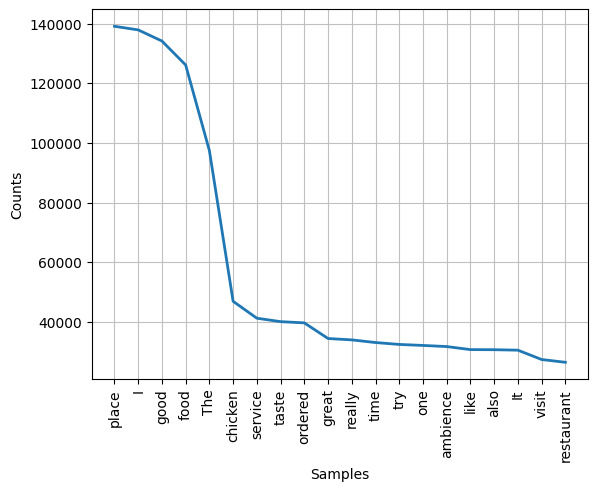

<Axes: xlabel='Samples', ylabel='Counts'>

In [70]:
# Create a plot to visualize the 20 most frequent words (optional)
fd.plot(20)

## Performing Bi-Gram & Tri-gram analysis on data

In [71]:
# Import bigrams and trigrams functions from nltk
from nltk import FreqDist, bigrams , trigrams

In [72]:
# Generate bigrams (pairs of consecutive words) from the 'total_reviews_1D' list
# Print the bigrams (for inspection, might be very large)

bi_grams = bigrams(total_reviews_1D)
bi_grams

<generator object bigrams at 0x0000012131B20BA0>

In [73]:
# Create a FreqDist object to analyze bigram frequency
fd_bigrams = FreqDist()

# Count the occurrences of each bigram and update the FreqDist object
for bigram in bi_grams:
    fd_bigrams[bigram]= fd_bigrams[bigram]+1


In [74]:
# Find the 20 most frequent bigrams and print them
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

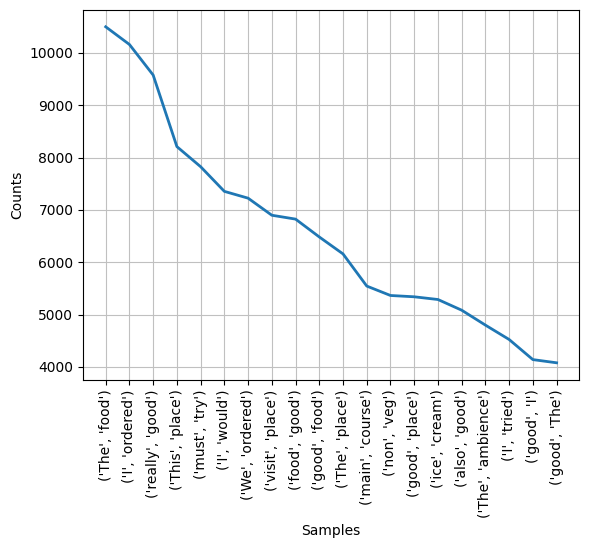

<Axes: xlabel='Samples', ylabel='Counts'>

In [75]:
# Create a plot to visualize the 20 most frequent bigrams (optional)
fd_bigrams.plot(20)

In [76]:
# Find the 100 most frequent bigrams and print them (optional)
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

In [77]:
# Generate trigrams (triplets of consecutive words) from 'total_reviews_1D'
tri_grams = trigrams(total_reviews_1D)

In [78]:
# Create a FreqDist object to analyze trigram frequency
fd_trigrams = FreqDist()

# Count the occurrences of each trigram and update the FreqDist object
for trigram in tri_grams:
    fd_trigrams[trigram]= fd_trigrams[trigram]+1

In [79]:
# Count the occurrences of each trigram and update the FreqDist object
fd_trigrams.most_common(50)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

## Extract geographical co-ordinates from data..

In [80]:
df.head(3)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   

                                             address             name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...            Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                    080 41714161   
2          Yes         No   3.8    918                  +91 9663487993   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari

In [81]:
# Access the 'location' column containing location information
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [82]:
# Find all unique location values present in the 'location' column
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [83]:
# Count the number of unique locations
len(df['location'].unique())

94

In [84]:
# WARNING: This code modifies the original DataFrame! 
# It appends a standardized location string to each existing location in the 'location' column.  
# Consider creating a new column instead to avoid altering the original data.
df['location'] = df['location'] + ", Bangalore , Karnataka , India "

In [85]:
# Print the modified 'location' column (for inspection)
df['location']

0             Banashankari, Bangalore , Karnataka , India 
1             Banashankari, Bangalore , Karnataka , India 
2             Banashankari, Bangalore , Karnataka , India 
3             Banashankari, Bangalore , Karnataka , India 
4             Basavanagudi, Bangalore , Karnataka , India 
                               ...                        
51712           Whitefield, Bangalore , Karnataka , India 
51713           Whitefield, Bangalore , Karnataka , India 
51714           Whitefield, Bangalore , Karnataka , India 
51715    ITPL Main Road, Whitefield, Bangalore , Karnat...
51716    ITPL Main Road, Whitefield, Bangalore , Karnat...
Name: location, Length: 51717, dtype: object

In [86]:
# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()

In [87]:
# Check for missing values in the 'location' column after modification
df_copy['location'].isnull().sum()

21

In [88]:
# Drop rows with missing values in the 'location' column (consider alternative approaches like imputation)
df_copy = df_copy.dropna(subset = ['location'])

In [89]:
df_copy['location'].isnull().sum()

0

In [90]:
locations = pd.DataFrame(df_copy['location'].unique())
locations

0
0        Banashankari, Bangalore , Karnataka , India 
1        Basavanagudi, Bangalore , Karnataka , India 
2         Mysore Road, Bangalore , Karnataka , India 
3           Jayanagar, Bangalore , Karnataka , India 
4   Kumaraswamy Layout, Bangalore , Karnataka , In...
..                                                ...
88     West Bangalore, Bangalore , Karnataka , India 
89        Magadi Road, Bangalore , Karnataka , India 
90          Yelahanka, Bangalore , Karnataka , India 
91     Sahakara Nagar, Bangalore , Karnataka , India 
92             Peenya, Bangalore , Karnataka , India 

[93 rows x 1 columns]

In [91]:
locations.columns

RangeIndex(start=0, stop=1, step=1)

In [92]:
# Rename the single column in 'locations' to 'name' for clarity
locations.columns = ['name']
locations

name
0        Banashankari, Bangalore , Karnataka , India 
1        Basavanagudi, Bangalore , Karnataka , India 
2         Mysore Road, Bangalore , Karnataka , India 
3           Jayanagar, Bangalore , Karnataka , India 
4   Kumaraswamy Layout, Bangalore , Karnataka , In...
..                                                ...
88     West Bangalore, Bangalore , Karnataka , India 
89        Magadi Road, Bangalore , Karnataka , India 
90          Yelahanka, Bangalore , Karnataka , India 
91     Sahakara Nagar, Bangalore , Karnataka , India 
92             Peenya, Bangalore , Karnataka , India 

[93 rows x 1 columns]

In [93]:
# Import Nominatim geocoder from geopy.geocoders (assuming geopy is installed)
from geopy.geocoders import Nominatim

In [94]:
# Initialize a Nominatim geolocator object with user_agent and timeout settings
Nominatim(user_agent="app", timeout=None)

In [95]:
geolocator = Nominatim(user_agent="app", timeout=None)

In [96]:
# Initialize empty lists to store latitudes and longitudes
lat = []
lon = []

# Loop through each unique location name in the 'name' column of 'locations' DataFrame
for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        # Assign NaN values to latitude and longitude if geocoding fails
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        # Extract latitude and longitude from the geocode result
        lat.append(location.latitude)
        lon.append(location.longitude)

In [97]:
# Add new columns 'latitude' and 'longitude' to the 'locations' DataFrame
locations['latitude']= lat
locations['longitude']= lon

In [98]:
# Print the final 'locations' DataFrame with geocoded information (latitude and longitude)
locations

name   latitude  longitude
0        Banashankari, Bangalore , Karnataka , India   12.939333  77.553982
1        Basavanagudi, Bangalore , Karnataka , India   12.941726  77.575502
2         Mysore Road, Bangalore , Karnataka , India   12.953672  77.542512
3           Jayanagar, Bangalore , Karnataka , India   12.941849  77.586898
4   Kumaraswamy Layout, Bangalore , Karnataka , In...  12.906768  77.559502
..                                                ...        ...        ...
88     West Bangalore, Bangalore , Karnataka , India   13.009476  77.553089
89        Magadi Road, Bangalore , Karnataka , India   12.975608  77.555356
90          Yelahanka, Bangalore , Karnataka , India   13.100698  77.596345
91     Sahakara Nagar, Bangalore , Karnataka , India   13.062147  77.580061
92             Peenya, Bangalore , Karnataka , India   13.032942  77.527325

[93 rows x 3 columns]

## Preparing data for  Geographical Heatmaps 

In [99]:
# Check for missing values in 'latitude' and 'longitude' columns of 'locations' DataFrame
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [100]:
# Filter the 'locations' DataFrame to show rows with missing latitudes (potential geocoding errors)
locations[locations['latitude'].isna()]

name  latitude  longitude
79  Rammurthy Nagar, Bangalore , Karnataka , India        NaN        NaN
85   Sadashiv Nagar, Bangalore , Karnataka , India        NaN        NaN

In [101]:
# WARNING: This code suppresses warnings using filterwarnings. This is generally not recommended 
# as it can hide potential issues. Consider addressing the root cause of the warnings instead.import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [102]:
# Manually assign latitude and longitude values for specific rows (79 and 85)  
# This might be inaccurate data, consider alternative approaches like spatial interpolation.
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [103]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [104]:
# Check again for missing latitudes after manual assignment (might not be ideal)
locations[locations['latitude'].isna()]

Empty DataFrame
Columns: [name, latitude, longitude]
Index: []

## Buildng geographical Heat Maps for North Indian Resturants

In [105]:
# Access the 'cuisines' column containing cuisine information
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [106]:
# Check for missing values in the 'cuisines' column
df['cuisines'].isnull().sum()

45

In [107]:
# Drop rows with missing cuisine information (consider alternative approaches like imputation)
df = df.dropna(subset= ['cuisines'])

In [108]:
# Verify that there are no more missing values in 'cuisines' after dropping rows
df['cuisines'].isnull().sum()

0

In [109]:
# Filter the DataFrame to include rows where 'cuisines' contains 'North Indian' (case-sensitive)
# Print the filtered DataFrame 'north_india' (for inspection)
north_india = df[df['cuisines'].str.contains('North Indian')]
north_india

index                                                url  \
0          0  https://www.zomato.com/bangalore/jalsa-banasha...   
1          1  https://www.zomato.com/bangalore/spice-elephan...   
3          3  https://www.zomato.com/bangalore/addhuri-udupi...   
4          4  https://www.zomato.com/bangalore/grand-village...   
5          5  https://www.zomato.com/bangalore/timepass-dinn...   
...      ...                                                ...   
51706  51706  https://www.zomato.com/bangalore/red-glow-whit...   
51708  51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51709  51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51716  51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
...                                                  ...   
51706  Poornima Complex, Dodsworth Layout, Whitefield...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                               name online_order book_table  rate  votes  \
0                             Jalsa          Yes        Yes   4.1    775   
1                    Spice Elephant          Yes         No   4.1    787   
3             Addhuri Udupi Bhojana           No         No   3.7     88   
4                     Grand Village           No         No   3.8    166   
5                   Timepass Dinner          Yes         No   3.8    286   
...                             ...          ...        ...   ...    ...   
51706                      Red Glow           No         No   3.7     27   
51708        Keys Cafe - Keys Hotel           No         No   2.8    161   
51709    The Farm House Bar n Grill           No         No   3.7     34   
51711                       Bhagini           No         No   2.5     81   
51716  The Nest - The Den Bengaluru           No         No   3.4     13   

                                  phone  \
0        080 42297555\r\n+91 9743772233   
1                          080 41714161   
3                        +91 9620009302   
4      +91 8026612447\r\n+91 9901210005   
5      +91 9980040002\r\n+91 9980063005   
...                                 ...   
51706                    +91 9740571131   
51708      080 39451000\n+91 8884038484   
51709    +91 9980121279\n+91 9900240646   
51711                      080 65951222   
51716                    +91 8071117272   

                                                location           rest_type  \
0           Banashankari, Bangalore , Karnataka , India        Casual Dining   
1           Banashankari, Bangalore , Karnataka , India        Casual Dining   
3           Banashankari, Bangalore , Karnataka , India          Quick Bites   
4           Basavanagudi, Bangalore , Karnataka , India        Casual Dining   
5           Basavanagudi, Bangalore , Karnataka , India        Casual Dining   
...                                                  ...                 ...   
51706         Whitefield, Bangalore , Karnataka , India                  Pub   
51708         Whitefield, Bangalore , Karnataka , India   Casual Dining, Bar   
51709         Whitefield, Bangalore , Karnataka , India   Casual Dining, Bar   
51711         Whitefield, Bangalore , Karnataka , India   Casual Dining, Bar   
51716  ITPL Main Road, Whitefield, Bangalore , Karnat...  Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Ma

In [110]:
# Get the dimensions (number of rows and columns) of the 'north_india' DataFrame
north_india.shape

(21085, 18)

In [111]:
north_india.head(2)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                    080 41714161   

                                       location      rest_type  \
0  Banashankari, Bangalore , Karnataka , India   Casual Dining   
1  Banashankari, Bangalore , Karnataka , India   Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [112]:
# Count the occurrences of each unique location value in the 'location' column of 'north_india'
north_india['location'].value_counts()

location
BTM, Bangalore , Karnataka , India                   2469
HSR, Bangalore , Karnataka , India                   1123
Whitefield, Bangalore , Karnataka , India            1059
Marathahalli, Bangalore , Karnataka , India          1038
JP Nagar, Bangalore , Karnataka , India               958
                                                     ... 
Hebbal, Bangalore , Karnataka , India                   4
Jakkur, Bangalore , Karnataka , India                   3
Central Bangalore, Bangalore , Karnataka , India        2
West Bangalore, Bangalore , Karnataka , India           1
Peenya, Bangalore , Karnataka , India                   1
Name: count, Length: 90, dtype: int64

In [113]:
north_india['location'].value_counts().reset_index()

location  count
0                 BTM, Bangalore , Karnataka , India    2469
1                 HSR, Bangalore , Karnataka , India    1123
2          Whitefield, Bangalore , Karnataka , India    1059
3        Marathahalli, Bangalore , Karnataka , India    1038
4            JP Nagar, Bangalore , Karnataka , India     958
..                                                ...    ...
85             Hebbal, Bangalore , Karnataka , India       4
86             Jakkur, Bangalore , Karnataka , India       3
87  Central Bangalore, Bangalore , Karnataka , India       2
88     West Bangalore, Bangalore , Karnataka , India       1
89             Peenya, Bangalore , Karnataka , India       1

[90 rows x 2 columns]

In [114]:
# Create a DataFrame 'north_india_rest_count' with location names and their corresponding counts
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'location':'name'})

In [115]:
north_india_rest_count

name  count
0                 BTM, Bangalore , Karnataka , India    2469
1                 HSR, Bangalore , Karnataka , India    1123
2          Whitefield, Bangalore , Karnataka , India    1059
3        Marathahalli, Bangalore , Karnataka , India    1038
4            JP Nagar, Bangalore , Karnataka , India     958
..                                                ...    ...
85             Hebbal, Bangalore , Karnataka , India       4
86             Jakkur, Bangalore , Karnataka , India       3
87  Central Bangalore, Bangalore , Karnataka , India       2
88     West Bangalore, Bangalore , Karnataka , India       1
89             Peenya, Bangalore , Karnataka , India       1

[90 rows x 2 columns]

In [116]:
# Merge 'north_india_rest_count' (location names and counts) with 'locations' (geocodes) on 'name' column (assuming location names match)
# This creates a DataFrame 'heatmap_df' suitable for creating a heatmap
heatmap_df = north_india_rest_count.merge(locations, on='name', how='left')

In [117]:
# Print the 'heatmap_df' DataFrame containing location names, counts, and geocodes (for inspection)
heatmap_df

name  count   latitude  \
0                 BTM, Bangalore , Karnataka , India    2469  12.911276   
1                 HSR, Bangalore , Karnataka , India    1123  12.911623   
2          Whitefield, Bangalore , Karnataka , India    1059  12.969637   
3        Marathahalli, Bangalore , Karnataka , India    1038  12.955257   
4            JP Nagar, Bangalore , Karnataka , India     958  12.909694   
..                                                ...    ...        ...   
85             Hebbal, Bangalore , Karnataka , India       4  13.038218   
86             Jakkur, Bangalore , Karnataka , India       3  13.078474   
87  Central Bangalore, Bangalore , Karnataka , India       2  12.973393   
88     West Bangalore, Bangalore , Karnataka , India       1  13.009476   
89             Peenya, Bangalore , Karnataka , India       1  13.032942   

    longitude  
0   77.604565  
1   77.638862  
2   77.749745  
3   77.698416  
4   77.586607  
..        ...  
85  77.591900  
86  77.606894  
87  77.611247  
88  77.553089  
89  77.527325  

[90 rows x 4 columns]

In [118]:
# Import libraries for creating a heatmap (assuming folium is installed)
import folium

In [119]:
# Print the basemap (initially empty)
basemap = folium.Map()

In [120]:
basemap

In [121]:
from folium.plugins import HeatMap

In [122]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [123]:
# Create a HeatMap object using latitude, longitude, and count data from 'heatmap_df'
# Add the HeatMap layer to the basemap
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)

In [124]:
basemap

## Perform Automation

In [125]:
# Define a function 'get_heatmap' that takes a cuisine type as input
def get_heatmap(cuisine):
    
    # Filter the DataFrame 'df' to include rows where 'cuisines' contains the specified 'cuisine' (case-sensitive)
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]

    # Count the occurrences of each unique location value in the 'location' column of the filtered DataFrame
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'location':'name'})
   
    # Merge 'cuisine_rest_count' (location names and counts) with 'locations' (geocodes) on 'name' column (assuming location names match)
    # This creates a DataFrame 'heatmap_df' suitable for creating a heatmap
    heatmap_df = cuisine_rest_count.merge(locations, on='name', how='left')
    print(heatmap_df.head(4))

    # Create a base map using folium
    basemap = folium.Map()

    # Create a HeatMap object using latitude, longitude, and count data from 'heatmap_df'
    # Add the HeatMap layer to the basemap
    HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)

    # Return the final basemap object containing the heatmap
    return basemap
    

In [126]:
# Call the 'get_heatmap' function with 'South Indian' cuisine as input
get_heatmap('South Indian')

                                        name  count   latitude  longitude
0        BTM, Bangalore , Karnataka , India     815  12.911276  77.604565
1   JP Nagar, Bangalore , Karnataka , India     437  12.909694  77.586607
2        HSR, Bangalore , Karnataka , India     436  12.911623  77.638862
3  Jayanagar, Bangalore , Karnataka , India     416  12.941849  77.586898


In [127]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)